<a href="https://colab.research.google.com/github/onuralpArsln/finTech/blob/main/getDataFromBinanceWithoutAccount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/onuralpArsln/finTech/blob/main/getDataFromBinanceWithoutAccount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gerekli Kütüphane yoksa yükle

In [ ]:
!pip install python-binance -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 12.7 MB/s eta 0:00:00


Datayı hesap bilgilisi olmadan almak burası, ancak colabda çalışmama ihtimali yüksek bi sebepten dolayı colab istekleri yetkisiz gözüküyor

In [53]:
import requests
import time


def getSevenDayData(lastDay=1):
    url = 'https://api.binance.com/api/v3/klines'
    current_time = int(time.time() * 1000)
    startDay = current_time - ((lastDay+14) * 24 * 60 * 60 * 1000)
    endDay = current_time - (lastDay * 24 * 60 * 60 * 1000)

    params = {
    'symbol': 'BTCUSDT',      # The trading pair you're interested in
    'interval': '1h',         # 1-hour candlestick data (hourly prices)
    'startTime': startDay,  # Data from 30 days ago
    'endTime': endDay,    # Data until 20 days ago
    }

    response = requests.get(url, params=params)
    data = response.json()

    result=[]

    for candle in data:
        close_price = candle[4]
        result.append(close_price)

    return result




test et

In [2]:
print(getSevenDayData())

['59851.09000000', '59706.39000000', '59794.03000000', '59769.11000000', '59914.00000000', '59876.00000000', '59981.99000000', '59885.26000000', '59786.00000000', '59810.00000000', '60024.01000000', '60036.00000000', '60006.97000000', '59993.03000000', '60025.95000000', '60235.22000000', '60238.01000000', '60155.93000000', '60117.99000000', '60160.00000000', '60164.01000000', '60196.00000000', '60069.99000000', '60016.00000000', '59991.30000000', '60000.51000000', '60104.39000000', '60189.98000000', '60279.52000000', '60335.41000000', '59950.05000000', '59814.07000000', '59971.09000000', '59878.22000000', '59795.99000000', '59651.69000000', '59430.31000000', '59132.00000000', '58666.36000000', '58607.07000000', '58263.99000000', '58575.09000000', '58352.00000000', '58670.00000000', '58707.43000000', '58911.10000000', '58924.98000000', '58636.54000000', '58749.99000000', '58663.99000000', '58527.99000000', '58497.10000000', '57604.00000000', '57881.69000000', '57809.98000000', '58176.01

toplanan bilgiyi csv formatına çevirme kodu

In [54]:
import csv

import pandas as pd

data = getSevenDayData(1)

df = pd.DataFrame(data)

df.to_csv('data/lastWeek.csv', index=False, header=False)

csv bilgilerini numpy arraya çevirme kodu

In [4]:
!pip install numpy -q

In [61]:
import numpy as np


loaded_df = pd.read_csv("data/lastWeek.csv", header=None)

# regular python list 
loaded_array = loaded_df.values.tolist()

# Convert DataFrame back to NumPy array
loaded_numpy = loaded_df.to_numpy()

loaded_df.head()


,0
0,54326.00
1,54578.71
2,54546.99
3,54632.17
4,54780.00


Colab kullanırken csvleri otomatik çekme kodu

In [62]:
## Güncel data linkleri <br> <br>

file1 = "https://raw.githubusercontent.com/onuralpArsln/finTech/refs/heads/main/data/lastWeek.csv?token=GHSAT0AAAAAACLQZ7SITTNWYGU4AFMRQCZ2ZXPXZZA"
file2 = "https://raw.githubusercontent.com/onuralpArsln/finTech/refs/heads/main/data/twoWeek.csv?token=GHSAT0AAAAAACLQZ7SIAZ6M2GER76YGBQ4EZXPXZ3A"
file3 = "https://raw.githubusercontent.com/onuralpArsln/finTech/refs/heads/main/data/fourWeek.csv?token=GHSAT0AAAAAACLQZ7SIZUNDS5LREKVI4BA4ZXPXY2Q"

allLinks =[file1, file2, file3]

In [ ]:
!pip install pandas -q

In [55]:
import pandas as pd


series_list=[]
for url in allLinks:
  df= pd.read_csv(url, header=None)
  data=df.values.tolist()
  single_dimensional_list = [item[0] for item in data]
  series_list.append( single_dimensional_list)



linklerden elde edilen dataframeleri eğitim ve test olarak ayırcaz son 10 test datası şuan

In [56]:
test_dfs=[]
train_dfs=[]

for series in series_list:
 
    last_10 = series[-10:]
  
    rest = series[:-10]
    # append to dataset
    test_dfs.append(last_10)
    train_dfs.append(rest)

print(test_dfs[0])


[63174.0, 62836.98, 62917.11, 62889.57, 62860.0, 62908.82, 62999.98, 63091.02, 63028.0, 63115.99]


## TRAINING TRAINING TRAINING


Autoregressive Integrated Moving Average

In [28]:
!pip install statsmodels -q

In [84]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

"""
# Örnek zaman serisi verisi
data = [1,2,4,7]
df = pd.Series(data)

# ARIMA modeli
model = ARIMA(df, order=(1,1,1))
model_fit = model.fit()

# Tahmin
tahmin = model_fit.forecast(steps=1)
print(tahmin)
"""

def ARIMAGuess(data, stepCount=10):
    df = pd.Series(data)
    model = ARIMA(df, order=(2, 1, 2))
    model_fit = model.fit()
    tahmin = model_fit.forecast(steps=stepCount)

    return tahmin


In [85]:
guess_list=[]

for df in train_dfs:
   
    guess = ARIMAGuess(df,10)
    guess_list.append(guess.tolist())





c:\Users\onura\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\onura\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\onura\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\onura\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
print(guess_list[0])

[63260.67413593462, 63190.536545191426, 63151.6861300533, 63219.59174378608, 63240.843365148015, 63178.092590840715, 63171.15285125953, 63226.816591629344, 63222.6471672749, 63175.159324676315]


In [48]:
!pip install matplotlib -q


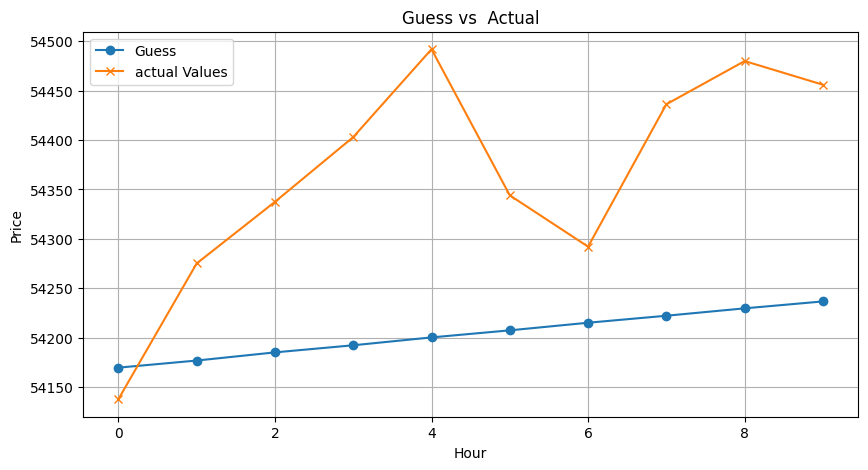

In [91]:
import matplotlib.pyplot as plt

# Sample data
list1 = guess_list[1]
list2 = test_dfs[1]

# Create a figure and axis
plt.figure(figsize=(10, 5))

# Plot both lists
plt.plot(list1, label='Guess', marker='o')
plt.plot(list2, label='actual Values', marker='x')

# Add titles and labels
plt.title('Guess vs  Actual')
plt.xlabel('Hour')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Show the plot
plt.grid()
plt.show()